In [1]:
%pwd

'/home/rand/github/LoxLM/LoxLM/src/utils'

In [2]:
from example_loader import ExampleLoader

/home/rand/github/LoxLM/LoxLM/src/.venv/lib/python3.10/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [2]:
from multi_example_selector import MultiExampleSelector, SemanticExampleRanker, FloatExampleRanker
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
from sentence_transformers import SentenceTransformer
from example_loader import ExampleLoader
from sklearn.preprocessing import OneHotEncoder

In [4]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [5]:
def encode(values):
        # Initialize an empty dictionary
    encoding_dict = {}
    # Initialize an empty list to store the encoded integers
    encoded_integers = []
    
    # Iterate through each string in the input list
    for string in values:
        # If the string is not already in the dictionary, add it and assign a new integer value
        if string not in encoding_dict:
            encoding_dict[string] = len(encoding_dict)  # Assign the next available integer
            
        # Append the integer corresponding to the string to the encoded_integers list
        encoded_integers.append(encoding_dict[string])
    
    return encoded_integers

In [6]:


def grab_values( mes: MultiExampleSelector, ):
    true_val = [example.model_dump()['suffix'] for example in mes.examples]
    enc = encode(true_val)
    for field, ranker in mes.field_rankers.items():
        if isinstance(ranker, SemanticExampleRanker):
            vals = ranker.embeddings
        elif isinstance(ranker, FloatExampleRanker):
            continue

            vals = ranker.examples
        else:
            continue
        yield vals, enc, field



In [7]:
def draw_umap(data, true_vals, n_neighbors=15, min_dist=0.1, n_components=2, metric='cosine', title='',):
    fit = umap.UMAP(
        n_neighbors=n_neighbors,
        min_dist=min_dist,
        n_components=n_components,
        metric=metric
    )
    
    u = fit.fit_transform(data)
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.scatter(u[:,0],u[:,1], c=true_vals, cmap= 'viridis', s= 40, alpha = .6, marker='o',)
    plt.title(title, fontsize =18)

In [8]:
keys = ['SeriesDescription', 'ProtocolName']
el = ExampleLoader(file = "./examples.json", tokenize= True, keys = keys)
examples_test, examples_store = el.get_splits()

In [9]:
examples_store

[Example(suffix='bold', series_description='To Mloc2 SMS2 3mm iso', protocol_name='To Mloc2 SMS2 3mm iso', task_name='NA', repetition_time=nan, echo_time=0.03, inversion_time=nan, pulse_sequence_type='NA', flip_angle=nan, manufacturer='Siemens', model='Prisma'),
 Example(suffix='bold', series_description='LITshort1 SMS2 3mm iso', protocol_name='LITshort1 SMS2 3mm iso', task_name='NA', repetition_time=nan, echo_time=0.03, inversion_time=nan, pulse_sequence_type='NA', flip_angle=nan, manufacturer='Siemens', model='Prisma'),
 Example(suffix='bold', series_description='Lang Loc1 SMS2 3mm iso', protocol_name='Lang Loc1 SMS2 3mm iso', task_name='NA', repetition_time=nan, echo_time=0.03, inversion_time=nan, pulse_sequence_type='NA', flip_angle=nan, manufacturer='Siemens', model='Prisma'),
 Example(suffix='bold', series_description='LITlong2 SMS2 3mm iso', protocol_name='LITlong2 SMS2 3mm iso', task_name='NA', repetition_time=nan, echo_time=0.03, inversion_time=nan, pulse_sequence_type='NA', f

In [10]:
model = SentenceTransformer("sentence-transformers/distiluse-base-multilingual-cased-v2")
mes = MultiExampleSelector(model = model, examples = examples_store)

/home/rand/github/LoxLM/LoxLM/src/.venv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


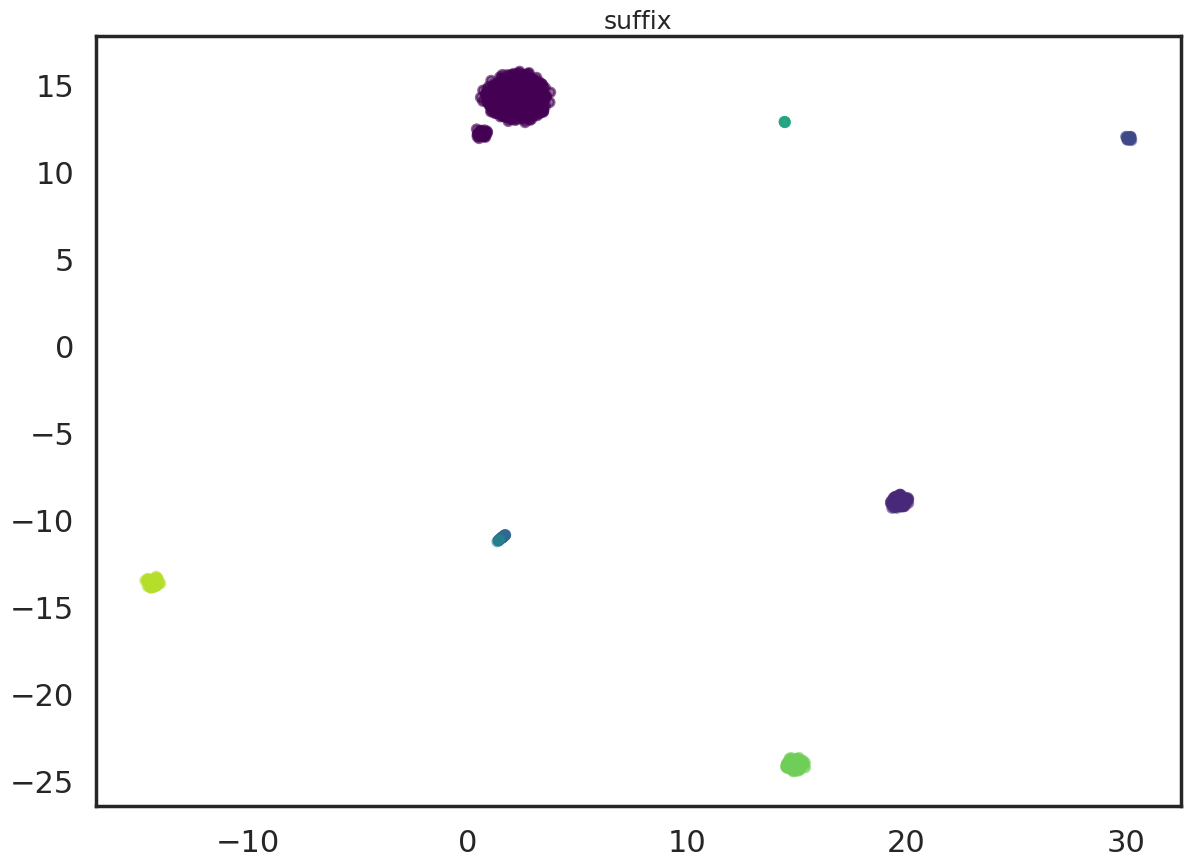

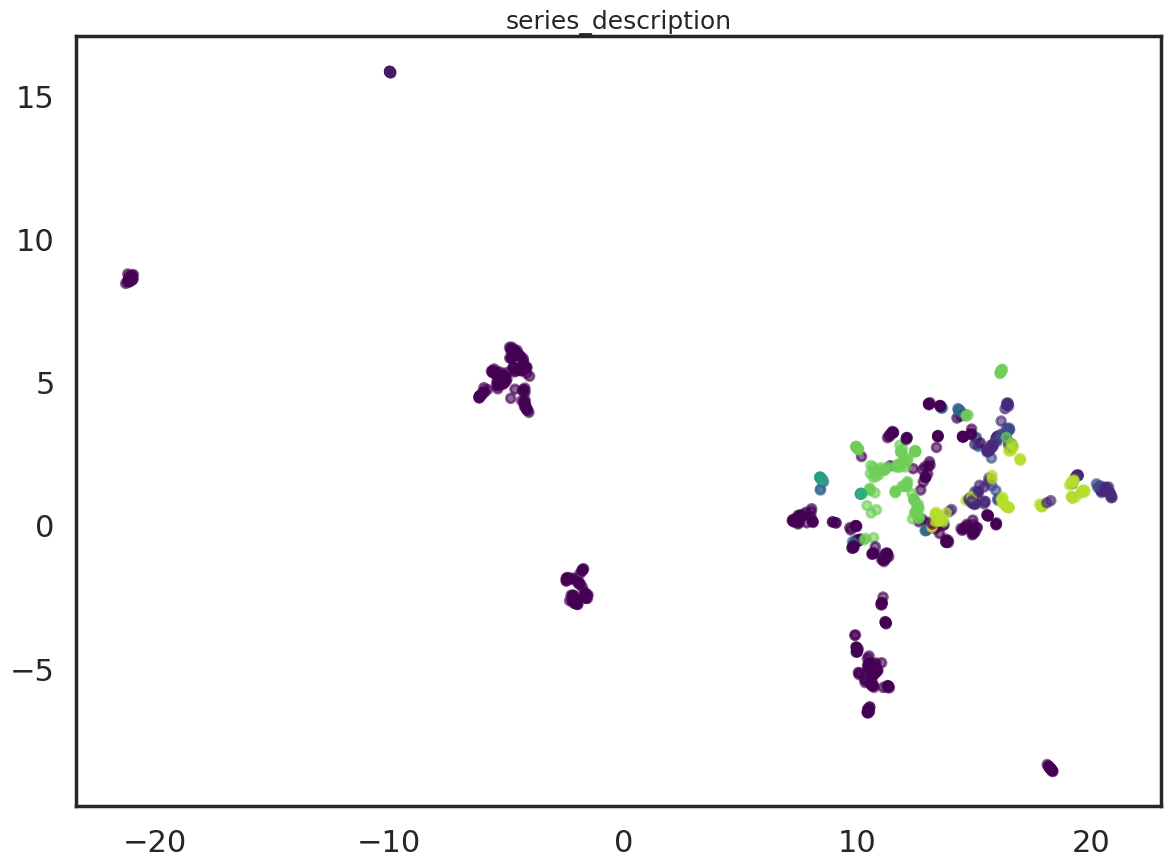

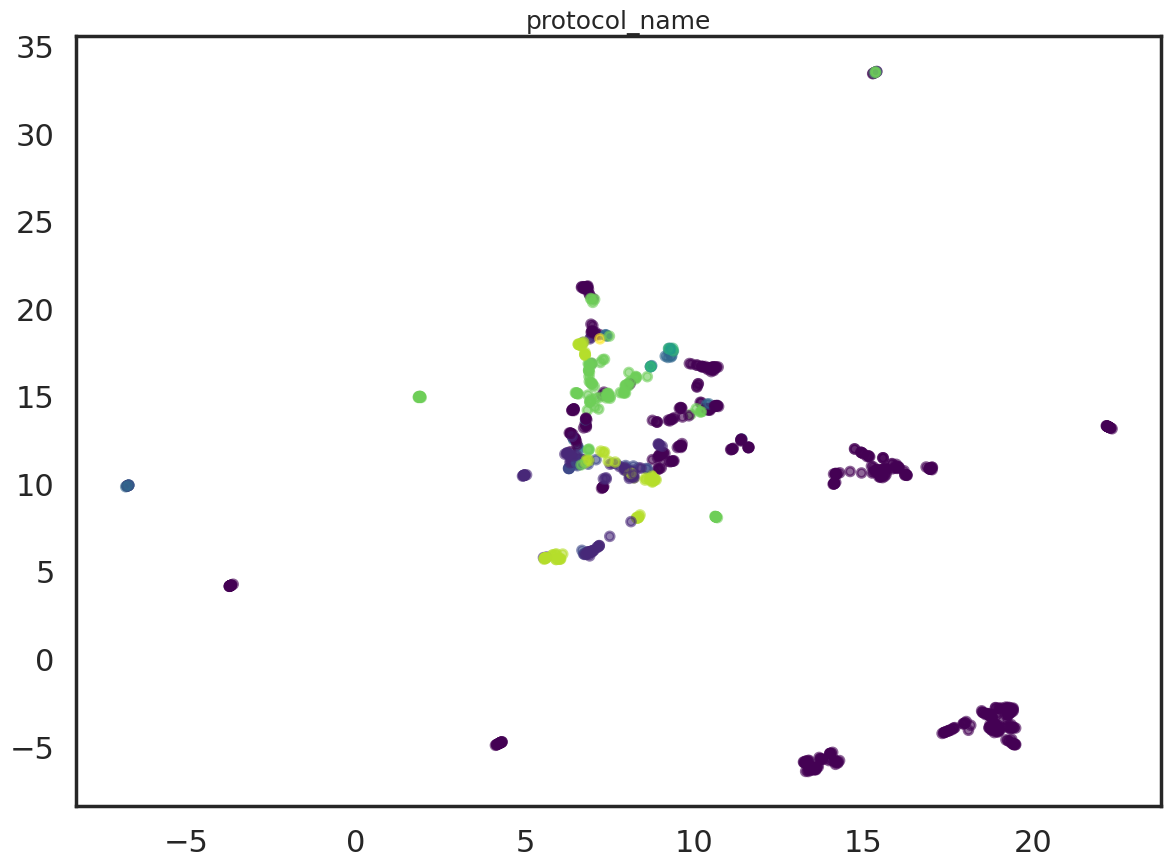

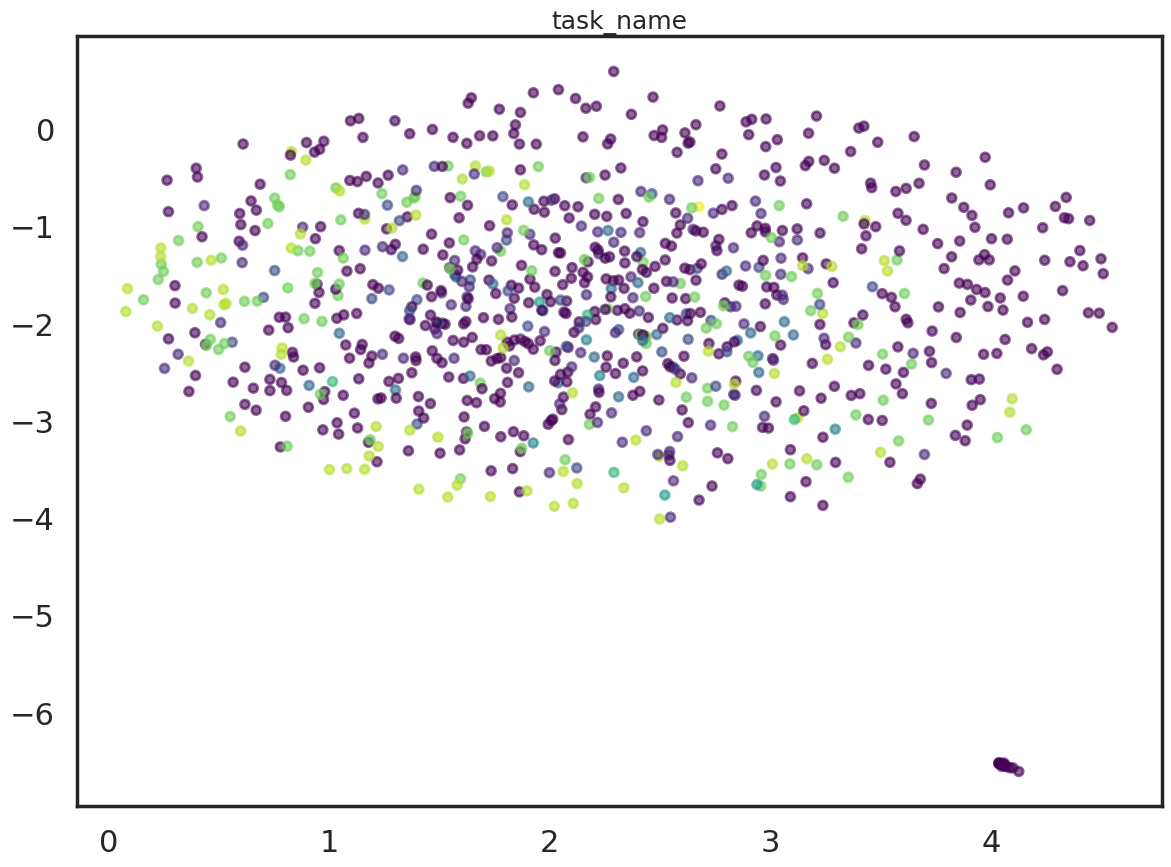

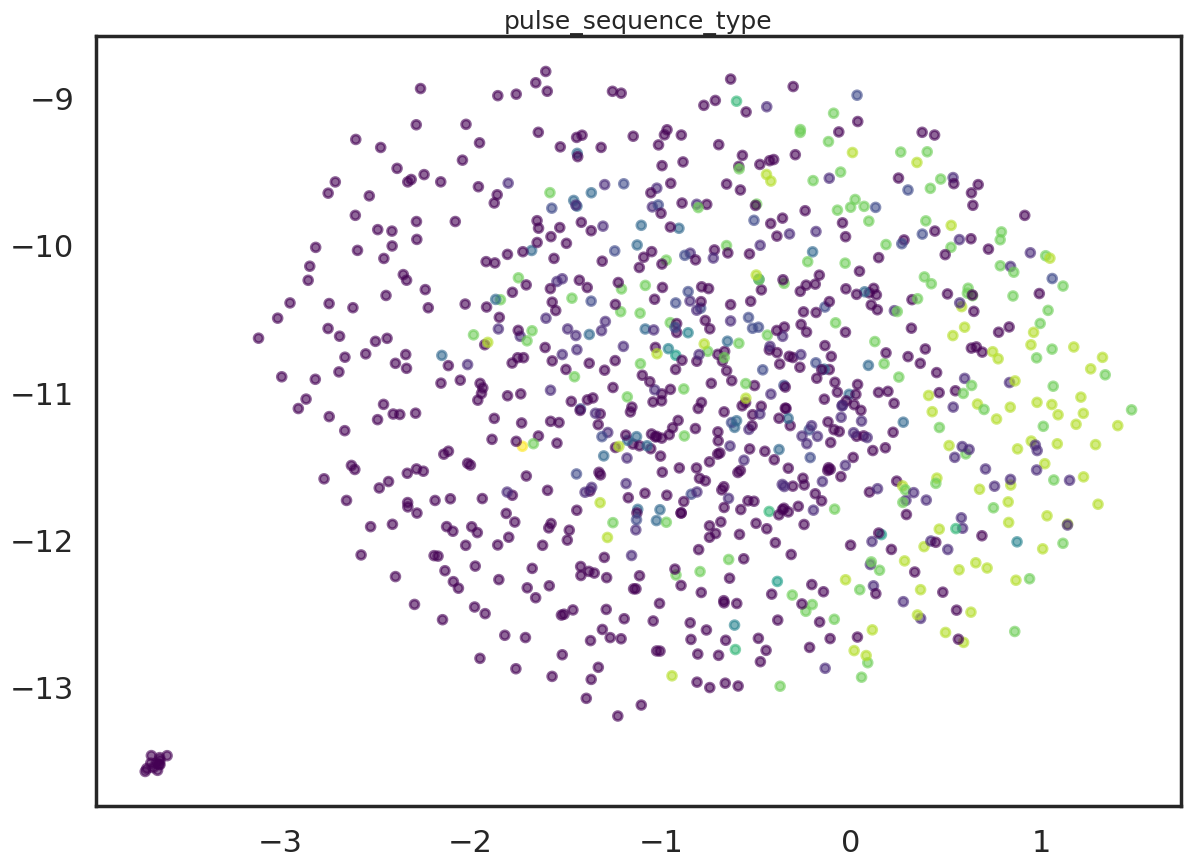

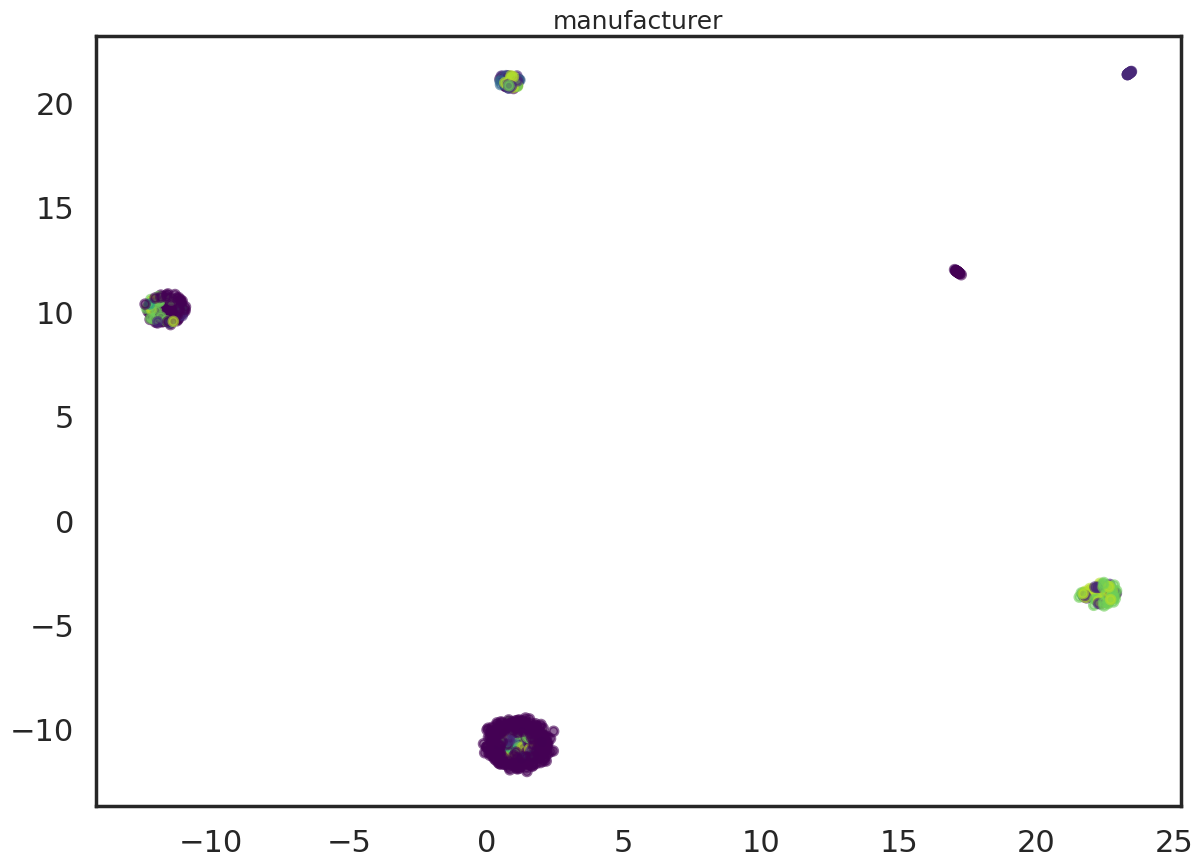

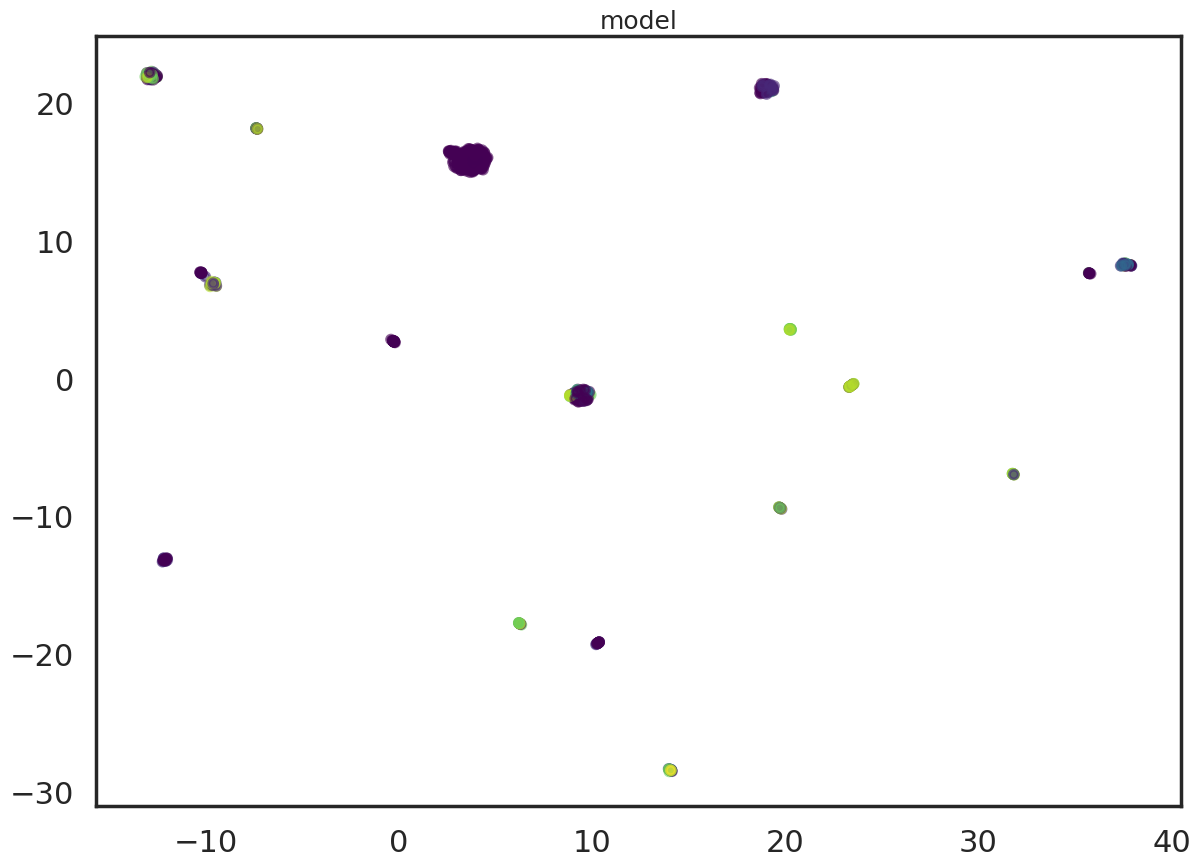

In [11]:
for X, true_val, field in grab_values(mes = mes):
    
    draw_umap(data = X, true_vals=true_val, title=field, metric= 'cosine',)
